In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df= pd.read_csv('Raw data.csv')

#### Data Preprocessing Steps:
- Removing Nun Values.
- Removing Duplicate Columns.
- Handling data with high number of values (ColorName and QualityName) using Grouping Method.
- Encoding Data using Dummies.
- Handling High Cardinality (ShapeName, CountryName and ITEM_NAME)

In [4]:
df.isnull().sum()

OrderType          0
OrderCategory      0
CustomerCode       0
CountryName        0
CustomerOrderNo    9
Custorderdate      0
UnitName           0
QtyRequired        0
TotalArea          0
Amount             0
ITEM_NAME          0
QualityName        0
DesignName         0
ColorName          0
ShapeName          0
AreaFt             0
dtype: int64

In [5]:
df.dropna(inplace=True)
#Test:
df.isnull().sum()

OrderType          0
OrderCategory      0
CustomerCode       0
CountryName        0
CustomerOrderNo    0
Custorderdate      0
UnitName           0
QtyRequired        0
TotalArea          0
Amount             0
ITEM_NAME          0
QualityName        0
DesignName         0
ColorName          0
ShapeName          0
AreaFt             0
dtype: int64

In [6]:
import numpy as np
df = df.drop_duplicates()
df.drop_duplicates(inplace=True)
df.shape

(18940, 16)

- 9 rows includes null values and 6 duplicate rows are removed

In [7]:
df.to_csv('Nonun&Duplicateremoved.csv', index=False)
df1=pd.read_csv('Nonun&Duplicateremoved.csv')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18940 entries, 0 to 18939
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderType        18940 non-null  object 
 1   OrderCategory    18940 non-null  object 
 2   CustomerCode     18940 non-null  object 
 3   CountryName      18940 non-null  object 
 4   CustomerOrderNo  18940 non-null  object 
 5   Custorderdate    18940 non-null  object 
 6   UnitName         18940 non-null  object 
 7   QtyRequired      18940 non-null  int64  
 8   TotalArea        18940 non-null  float64
 9   Amount           18940 non-null  float64
 10  ITEM_NAME        18940 non-null  object 
 11  QualityName      18940 non-null  object 
 12  DesignName       18940 non-null  object 
 13  ColorName        18940 non-null  object 
 14  ShapeName        18940 non-null  object 
 15  AreaFt           18940 non-null  float64
dtypes: float64(3), int64(1), object(12)
memory usage: 2.3+ MB


In [9]:
## Showing the unique value of each column

selected_columns = ['OrderType', 'OrderCategory', 'CustomerCode', 'CountryName',
       'CustomerOrderNo', 'Custorderdate', 'UnitName', 'QtyRequired',
       'TotalArea', 'Amount', 'ITEM_NAME', 'QualityName', 'DesignName',
       'ColorName', 'ShapeName', 'AreaFt']

for column in selected_columns:
    unique_values = df1[column].unique()
    num_unique_values = len(unique_values)
    print(f"{column} ({num_unique_values} unique values):\n{unique_values}\n")

# Display the total number of unique values for each column
unique_value_counts = df1[selected_columns].nunique()
print("Total number of unique values for each column:")
print(unique_value_counts)


OrderType (2 unique values):
['Area Wise' 'Pc Wise']

OrderCategory (2 unique values):
['Order' 'Sample']

CustomerCode (46 unique values):
['H-1' 'C-1' 'CC' 'M-1' 'E-2' 'B-3' 'G-1' 'M-2' 'P-5' 'T-2' 'I-2' 'RC'
 'T-6' 'JL' 'S-2' 'P-4' 'DR' 'PC' 'A-9' 'PD' 'K-2' 'T-5' 'T-4' 'A-6' 'B-2'
 'G-4' 'B-4' 'C-2' 'L-2' 'F-1' 'F-2' 'H-2' 'C-3' 'R-4' 'V-1' 'L-5' 'TGT'
 'A-11' 'N-1' 'CTS' 'S-3' 'L-4' 'L-3' 'K-3' 'F-6' 'T-9']

CountryName (15 unique values):
['USA' 'INDIA' 'CANADA' 'SOUTH AFRICA' 'ITALY' 'ROMANIA' 'AUSTRALIA' 'UK'
 'LEBANON' 'BELGIUM' 'BRAZIL' 'CHINA' 'ISRAEL' 'POLAND' 'UAE']

CustomerOrderNo (4862 unique values):
['1873354' '1918436' '2149526' ... 'S 1272' 'S 1280' 'S 1281']

Custorderdate (776 unique values):
['2017-01-16 0:00' '2017-02-01 0:00' '2017-07-12 0:00' '2017-09-04 0:00'
 '2017-05-12 0:00' '2017-05-25 0:00' '2017-02-27 0:00' '2017-10-31 0:00'
 '2018-10-08 0:00' '2019-01-18 0:00' '2019-06-22 0:00' '2018-12-25 0:00'
 '2017-04-10 0:00' '2018-02-27 0:00' '2018-12-04 0:00' '2

###### We have 821 unique values for colors, try to decrease them that we can use in our modeling as an important feature:
- 1:first using Primary Colors mentioned in first two words of each string
- 2:Grouping colors to main colors

In [10]:
# Function to extract the primary color
def extract_primary_color(color_name):
    # Split the color string by '/'
    colors = color_name.split('/')
    # The primary color is the first color mentioned
    return colors[0]

# Apply the function to create a new column 'MainColor'
df1['MainColor'] = df1['ColorName'].apply(extract_primary_color)

new_dataset = df1[['OrderType', 'OrderCategory', 'CustomerCode', 'CountryName',
                   'CustomerOrderNo', 'Custorderdate', 'UnitName', 'QtyRequired',
                   'TotalArea', 'Amount', 'ITEM_NAME', 'QualityName', 'DesignName',
                    'ShapeName', 'AreaFt','MainColor']].copy()

In [11]:
new_dataset.to_csv('Maincolor.csv', index=False)
df2=pd.read_csv('Maincolor.csv')

In [12]:
## Double check the unique value color column *** New column: Maincolor

selected_columns = ['MainColor']

for column in selected_columns:
    unique_values = df2[column].unique()
    num_unique_values = len(unique_values)
    print(f"{column} ({num_unique_values} unique values):\n{unique_values}\n")

# Display the total number of unique values for each column
unique_value_counts = df2[selected_columns].nunique()
print("Total number of unique values for each column:")
print(unique_value_counts)


MainColor (519 unique values):
['BEIGE' 'GREEN' 'TERRA' 'BLUE' 'SAGE' 'NAVY' 'BROWN' 'RUST' 'BLACK'
 'CHARCOAL' 'INDIGO' 'MUSHROOM' 'MULTI' 'DENIM' 'LAVA' 'PETAL' 'IVORY'
 'GREY' 'WHITE' 'W.WHITE' 'DOVE' 'CREAM' 'PRAIR' 'SILVER' 'SLBL(AZURE)'
 'AZURE' 'FOG' 'SKY' 'PEWTER' 'PLAT' 'CELDON' 'MOCHA' 'GUNMETAL' 'LT.BLUE'
 'RED' 'ANTIQUE' 'GOLD' 'BURGANDY' 'G-1' 'SAND' 'GRAPHITE' 'TAUPE' 'OCEAN'
 'PINK' '100 MULTI' '140 ORO MULTI' '159 ARANCIO MULTI'
 '170 TURCHASE MULTI' '601 NERO' '156 ROSSO  MULTI' '160 NERO MULTI'
 '149 VIOLA MULTI' 'COL-48 BEIGE' 'COL-60 NERO' 'NATURAL G-1' 'SEAGLASS'
 'NATURAL' '174 PETROLIO MULTI' 'GRWH' 'IRON' 'MM-81784' 'DUSTY ROSE'
 'FRENCH BLUE' 'TAN' 'ORANGE' 'LT.BROWN' 'ANTHRACITE' '4030' '8800'
 'WHEAT' 'TEAL' '4040' 'TEAL MULTI' 'MERCURY CHARCOAL' 'MERCURY DUSK'
 'MIST' 'LAMO' 'MOLA' 'GRBL' 'BLGR' 'LATTE' 'WHGR' 'ROSE' 'MINT' 'YELLOW'
 'APRICOT' '3333' 'SLATE IC-07' 'BLUE IF-02' 'CREAM 3N-20'
 'COL-70 TURCHASE' 'COL-100 MULTI' 'ICE' 'RASP' 'COL-1' 'COL-2' '112

In [13]:
blue_values = df2[df2['MainColor'].str.contains('TAN', case=False)]['MainColor'].unique()
print(blue_values)

['TAN' 'GARA JUTTAN']


In [14]:
color_groups = {
    'BLUE': ['BLUE', 'LT.BLUE', 'FRENCH BLUE', 'BLUE IF-02', 'EGG BLUE', 'JAC-11 BLUE',
             'SLATE BLUE', 'MEDALLION BLUE', 'ICE BLUE', 'PROVINCIAL BLUE', 'SEA FOAM',
             'COLONIAL BLUE', 'BLUE DIAMOND', 'DUSTY BLUE', 'TJX BLUE', 'ROBINS EGG BLUE',
             'TARQUISE BLUE', 'SKY BLUE', 'ROYAL BLUE', 'BLUE SHADOW', 'NILE BLUE', 'SEAFOAM',
             'LOCH BLUE', 'NAVY BLUE', 'DENIM BLUE', 'DK.BLUE', 'ROBIN EGG BLUE', 'SEAFOM',
             'OCHRE BLUE', 'MD. BLUE', 'BLUE [06K]', 'VIPER BLUE', 'NEW BLUE', 'SEAGLASS',
             'BLUE [2129]', 'DEEP BLUE [2083]', 'BLUE-LOT#772', 'BLUE-LOT#81', 'SLBL(AZURE)', 'AZURE',
             'BLUE-LOT#1471', 'LT BLUE', 'BLUE BEIGE', 'IVORY BLUE', 'NATURAL BLUE',
             'BEIGE BLUE', 'BLUE GREY', 'BLUE IVORY', 'BLUE BLACK', 'BLUE STEEL', 'SEAFOM',
             'BLUE MULTI', 'SILVER BLUE', 'LT. BLUE', 'BLUES', 'SEAFOAM', 'NAVY 150', 'NAVY', 'SKY',
             'NAVY BLUE', 'DK. NAVY', 'IVORY NAVY', 'WHITE NAVY', 'NAVY 150', 'OCEAN [2058]', 'OCEAN', '2058-OCEAN'],
    'GREEN': ['GREEN', 'OCEAN GREEN', 'FOREST GREEN', 'LAUREN GREEN', 'MADINA GREEN',
              'OLIVE GREEN', 'STONE GREEN', 'HERB GREEN', 'LT.GREEN', 'SEA GREEN', 'OPAL GREEN [2187]',
              'GREEN OPAL [2192]', 'DK.GREEN', 'EMERALD GREEN', 'RED GREEN', 'TEAL', 'DK.TEAL', 'TEAL [2079]', '2079-TEAL'],
    'BROWN': ['BROWN', 'RUST', 'TAUPE', 'MOCHA', 'CHOCO', 'LT.BROWN', 'DK.BROWN', 'CAMEL', 'TAN'],
    'RED': ['RED', 'BURGANDY', 'RUST', 'PINK', 'RED GREEN', 'RED NATURAL', 'ORANGE'],
    'BLACK': ['BLACK', 'NATURAL BLACK-3', 'BLACK-3', 'BLACK3', 'BLACK 3', 'IVORY BLACK', 'WHITE BLACK',
              'BLACK-19', 'BLACK GREY', 'OCHER BLACK', 'SILVER BLACK', 'GREY BLACK', 'NATURAL BLACK', 'BLACK NATURAL',
              'BLUE BLACK', 'BLACK MULTI', 'BLACK IVORY', 'BLACK'],
    'WHITE': ['WHITE', 'W.WHITE', 'WARM WHITE', 'RAMA WITH WHITE', 'AJ WHITE', 'DENIM WHITE', 'WHITE DENIM',
              'WHITE SILVER', 'WHITE GREY', 'WHITE NAVY', 'IVORY', 'IVORY-JL', 'IVORY MEDALLION', 'IVORY BORDER', 'IVORY A-9',
              'IVORY NAVY', 'IVORY RUST', 'WHITE BEIGE', 'ICE', 'OYESTER'],
    'YELLOW': ['YELLOW', 'GOLDEN YELLOW', 'OCHER', 'MUSTARD', 'DK. MUSTARD', 'LT. MUSTARD', 'MUSTARD LT.', 'MUSTARD DK.',
               'GOLD', 'ROSE GOLD', 'GOLDEN HOUR', 'GOLDEN '],
    'GREY': ['GREY', 'SILVER', 'SILVER-M1', 'NATURAL SILVER', 'SILVER PEONY', 'WHITE SILVER'
             'SILVER BLACK', 'SILVER GREY', 'SILVER ', 'SILVER BLUE', 'SILVER MULTI', 'GREY 2', 'GREY 1', 'ASH GREY', 'STEEL GREY',
             'MID GREY', 'DK GREY', 'LT GREY', 'GREY3', 'STONE GREY', 'NATURAL GREY', 'GREY-ARS558', 'GREY (TBL-7)',
             'NTRL GREY-3', 'NTRL GREY', 'NTRL GREY(G-3)', 'DK. GREY', 'GREY-18', 'BLACK GREY', 'BEIGE GREY', 'WHITE GREY',
             'BLUE GREY', 'GREY BLACK', 'NEW GREY', 'SILVER GREY', 'GOLD GREY', 'GREY BEIGE', 'CE-10 GREY', 'NTRL GRAPHITE',
             'GREY DENIM', 'IVORY GREY', 'GREY', 'JAC-33 GREY', 'MD. GREY', 'GREY BORDER', 'LT.GREY', 'DK.GREY', 'ASH',
             'CHARCOAL', 'MERCURY CHARCOAL', 'NATURAL CHARCOAL', 'CHARCOAL-PD', 'CHARCOAL D', 'DEEP CHARCOAL', 'IRON', 'GRAPHITE'],
    'MULTI': ['MULTI', '100 MULTI', '140 ORO MULTI', '159 ARANCIO MULTI', '170 TURCHASE MULTI', '156 ROSSO  MULTI',
              '160 NERO MULTI', '149 VIOLA MULTI', '174 PETROLIO MULTI', 'TEAL MULTI', 'COL-100 MULTI', '7-MULTI',
              'COL-150 MULTI', 'COL-156 MULTI', 'COL-148 MULTI', 'MULTI_COL', 'COL-159 MULTI', 'GOLD MULTI', 'COL-174 MULTI',
              '148 BEIGE MULTI', 'NATURAL MULTI', 'MULTI FLORAL', '156 ROSSO MULTI', 'IVORY MULTI', 'BLUE MULTI',
              'SILVER MULTI', 'PINK MULTI', 'WARM MULTI', 'BLACK MULTI'],
    'PURPLE': ['PURPLE', 'LT.PURPLE', 'MAUVE', 'LILA', 'LILAC'],
    'CREAM': ['CREAM', 'CREAM 3N-20', 'AQUA CREAM', 'BEIGE CREAM', 'BEIGE', 'COL-48 BEIGE', 'COL-481 BEIGE',
              'BEIGE [04E]', 'DK.BEIGE', 'NTRL BEIGE-2', 'BEIGE-2', 'NATURAL BEIGE', 'LT BEIGE', 'SAND']
}
# Function to assign color groups
def assign_color_group(color_name):
    for group, colors in color_groups.items():
        if any(color in color_name for color in colors):
            return group
    # If no match is found, return 'OTHER'
    return 'OTHER'

# Apply the function to create a new column 'ColorGroup'
df2['ColorGroup'] = df2['MainColor'].apply(assign_color_group)

groupedcolordata= df2[['OrderType', 'OrderCategory', 'CustomerCode', 'CountryName',
                   'CustomerOrderNo', 'Custorderdate', 'UnitName', 'QtyRequired',
                   'TotalArea', 'Amount', 'ITEM_NAME', 'QualityName', 'DesignName',
                    'ShapeName', 'AreaFt','ColorGroup']].copy()

In [15]:
groupedcolordata.to_csv('Nonun&Duplicateremoved&ColorGroup.csv', index=False)

#### Decreasing the unique value for quality column

In [16]:
# Function to extract the first two words from QualityName
def extract_primary_quality(quality_name):
    # Split the quality name by whitespaces
    words = quality_name.split()
    
    # Take the first two words
    if len(words) >= 2:
        return ' '.join(words[:2])
    else:
        return quality_name

# Apply the function to create a new column 'MainQuality'
df2['MainQuality'] = df2['QualityName'].apply(extract_primary_quality)

# Create a new dataset with the relevant columns
new_dataset_quality = df2[['OrderType', 'OrderCategory', 'CustomerCode', 'CountryName',
                   'CustomerOrderNo', 'Custorderdate', 'UnitName', 'QtyRequired',
                   'TotalArea', 'Amount', 'ITEM_NAME', 'MainQuality', 'DesignName',
                   'ShapeName', 'AreaFt', 'ColorGroup']].copy()


In [17]:
new_dataset_quality.to_csv('MainQuality.csv', index=False)
dfn3=pd.read_csv('MainQuality.csv')

In [18]:
## Double check the unique values in Quality column *** New column: MainQuality

selected_columns = ['MainQuality']

for column in selected_columns:
    unique_values = dfn3[column].unique()
    num_unique_values = len(unique_values)
    print(f"{column} ({num_unique_values} unique values):\n{unique_values}\n")

# Display the total number of unique values for each column
unique_value_counts = dfn3[selected_columns].nunique()
print("Total number of unique values for each column:")
print(unique_value_counts)

MainQuality (173 unique values):
['TUFTED 30C' 'TUFTED 60C' 'TUFTED 60C+10C' 'TUFTED 60C+VISC' 'SHAGGY 0C'
 'D.B. LILEN' 'D.B. LEFA' 'D.B. 60C' 'JACQUARD 60C' 'HANDWOVEN 8C'
 'FLATWOVEN JUTE+COTTON' 'KNOTTED 3/25' 'SHAGGY 00C' 'SHAGGY 60C'
 'HANDLOOM 60C+VISC' 'GUN TUFTED' 'HANDLOOM 60C+JUTE'
 'FLATWOVEN 60C+LUREX' 'FLATWOVEN JUTE' 'FLATWOVEN SEAGRASS+COTTON'
 'INDO-TIBBETAN 10/40' 'D.B. VISCOSE' 'KNOTTED 3/12' 'FLATWOVEN PET'
 'SHAGGY 30C' 'FLATWOVEN 30C/45C' 'KNOTTED 3/18' 'FLATWOVEN 60C'
 'HANDLOOM VISC' 'FLATWOVEN CHINDI' 'TUFTED VISCOSE' 'FLATWOVEN PVC'
 'FLATWOVEN COTTON' 'FLATWOVEN 60C+10C' 'D.B. 60C+LUREX'
 'FLATWOVEN 60C+COTTON' 'INDO-TIBBETAN 8/40' 'D.B. 60C+VISCOSE'
 'KNOTTED 3/22' 'TUFTED 10C' 'HANDLOOM 60C' 'TUFTED 60C+8C' 'SHAGGY 8C'
 'KNOTTED 4/25' 'KNOTTED 6/36' 'D.B. VISC' 'JACQUARD DP+8C' 'D.B. PET'
 'SHAGGY 60C+100C' 'FLATWOVEN COTTON+LUREX' 'KNOTTED 4/30'
 'FLATWOVEN 10C+COTTON' 'FLATWOVEN 60C+10C+LUREX' 'SHAGGY 60C+JUTE'
 'JACQUARD SARI' 'FLATWOVEN 60C+JUTE' 'TUFTE

In [19]:
Quality_Names = {
    'TUFTED': ['TUFTED 30C', 'TUFTED 60C', 'TUFTED 60C+10C', 'TUFTED 60C+VISC', 'GUN TUFTED', 'TUFTED VISCOSE',
            'TUFTED 10C', 'TUFTED 60C+8C', 'TUFTED 60C+30C', 'TUFTED 60C+60C', 'TUFTED 60C+LUREX', 'TUFTED 60C+DP',
            'TUFTED 52C', 'TUFTED 3/8', 'TUFTED 30C+10C', 'TUFTED 45C', 'TUFTED 52C+52C', 'TUFTED COTTON', 'TUFTED BOMBOO',
            'TBL TUFTED', 'TUFTED 60C+MICROFIBRE', 'TUFTED 10C+VISC', 'TUFTED 40C+10C', 'TUFTED 60C+40C+VISC', 'TUFTED POLYSTER',
               'TUFTED 15C', 'HAND TUFTED', 'TUFTED 60C+40C', 'TUFTED 40C', 'TUFTED 40C+40W/V', 'TUFTED 60'],
    'SHAGGY': ['SHAGGY 0C', 'SHAGGY 00C', 'SHAGGY 60C', 'SHAGGY 30C', 'SHAGGY 8C', 'SHAGGY 60C+100C', 'SHAGGY 60C+JUTE',
               'SHAGGY 60C+VISC', 'SHAGGY 60C+10C+LUREX', 'SHAGGY 60C+DP', 'SHAGGY 60C+10C', 'SHAGGY 10C', 
               'SHAGGY 60C+10C+LUREX+COTTON', 'SHAGGY 60C+COTTON', 'SHAGGY 60C+10C+COTTON', 'SHAGGY 10C+COTTON',
               'SHAGGY PET', 'SHAGGY 0C+JUTE'],
    'FLATWOVEN':['FLATWOVEN JUTE+COTTON', 'FLATWOVEN 60C+LUREX', 'FLATWOVEN JUTE', 'FLATWOVEN SEAGRASS+COTTON',
                'FLATWOVEN PET', 'FLATWOVEN 30C/45C', 'FLATWOVEN 60C', 'FLATWOVEN CHINDI', 'FLATWOVEN PVC', 
                  'FLATWOVEN COTTON', 'FLATWOVEN 60C+10C', 'FLATWOVEN 60C+COTTON', 'FLATWOVEN COTTON+LUREX', 
                  'FLATWOVEN 10C+COTTON', 'FLATWOVEN 60C+10C+LUREX', 'FLATWOVEN 60C+JUTE', 'FLATWOVEN 8C+COTTON',
                  'FLATWOVEN COTTON+10C', 'FLATWOVEN 60C+10C+LUREX+COTTON', 'FLATWOVEN 60C+COTTON+LUREX',
                  'FLATWOVEN DP', 'FLATWOVEN COTTON+8C', 'FLATWOVEN 60C+10C+COTTON', 'FLATWOVEN COTTON+CHINDI',
                  'FLATWOVEN 30C', 'FLATWOVEN JUTE+CHINDI', 'FLATWOVEN COTTON+JUTE', 'FLATWOVEN COTTON+60C', 
                  'FLATWOVEN COTTON+PET', 'FLATWOVEN JUTE+LUREX', 'FLATWOVEN JUTE+WOOL', 'FLATWOVEN COTTON+10C+BAMBOO',
                  'FLATWOVEN COTTON+60C+8C', 'FLATWOVEN JUTE+CHINDI+COTTON', 'FLATWOVEN 10C+BAMBOO', 'FLATWOVEN 45C',
                  'FLATWOVEN JUTE+10C', 'FLATWOVEN CHINDI+10C', 'FLATWOVEN 60C+30C', 'FLATWOVEN WOOL', 
                  'FLATWOVEN 30C+30C', 'FLATWOVEN COTTON+CHINDI+10C', 'FLATWOVEN LATHER', 'FLATWOVEN JUTE+LATHER',
                  'FLATWOVEN LATHER+COTTON', 'FLATWOVEN 0C+10C+60C', 'FLATWOVEN BOMBOO', 'FLATWOVEN SEAGRASS+LEFA', 
                  'FLATWOVEN SEAGRASS+VISC', 'FLATWOVEN 22C', 'FLATWOVEN SHUTTLE', 'FLATWOVEN COTTON+MICROPET', 
                  'FLATWOVEN 60C+60', 'FLATWOVEN COTTON+2', 'FLATWOVEN 10C', 'FLATWOVEN COTTON+JUTE+LUREX', 
                  'FLATWOVEN 60C+10C+JUTE', 'FLATWOVEN 8C', 'FLATWOVEN COTTON+10C+60C', 'FLATWOVEN COTTON+10C+8C', 
                  'FLATWOVEN 30C+COTTON', 'FLATWOVEN', 'FLATWOVEN POLYSTER'],
    'HANDLOOM': ['HANDWOVEN 8C', 'HANDLOOM 60C+VISC', 'HANDLOOM 60C+JUTE', 'HANDLOOM VISC', 'HANDLOOM 60C', 'HAND WOVEN',
                 'HANDLOOM TENCIL', 'HANDLOOM 30C', 'HANDLOOM 40C', 'HANDWOVEN 60C', 'HAND TUFTED', 'HANDWOVEN 10C+40C'],
}
def assign_quality_group(quality_name):
    for group, qualities in Quality_Names.items():
        if any(quality_name in quality for quality in qualities):
            return group
    # If no match is found, return 'OTHER'
    return 'OTHER'

# Apply the function to create a new column 'QualityGroup'
dfn3['QualityGroup'] = dfn3['MainQuality'].apply(assign_quality_group)

# Create a new dataset with the relevant columns
grouped_quality_data = dfn3[['OrderType', 'OrderCategory', 'CustomerCode', 'CountryName',
                             'CustomerOrderNo', 'Custorderdate', 'UnitName', 'QtyRequired',
                             'TotalArea', 'Amount', 'ITEM_NAME', 'QualityGroup', 'DesignName',
                             'ShapeName', 'AreaFt', 'ColorGroup']].copy()

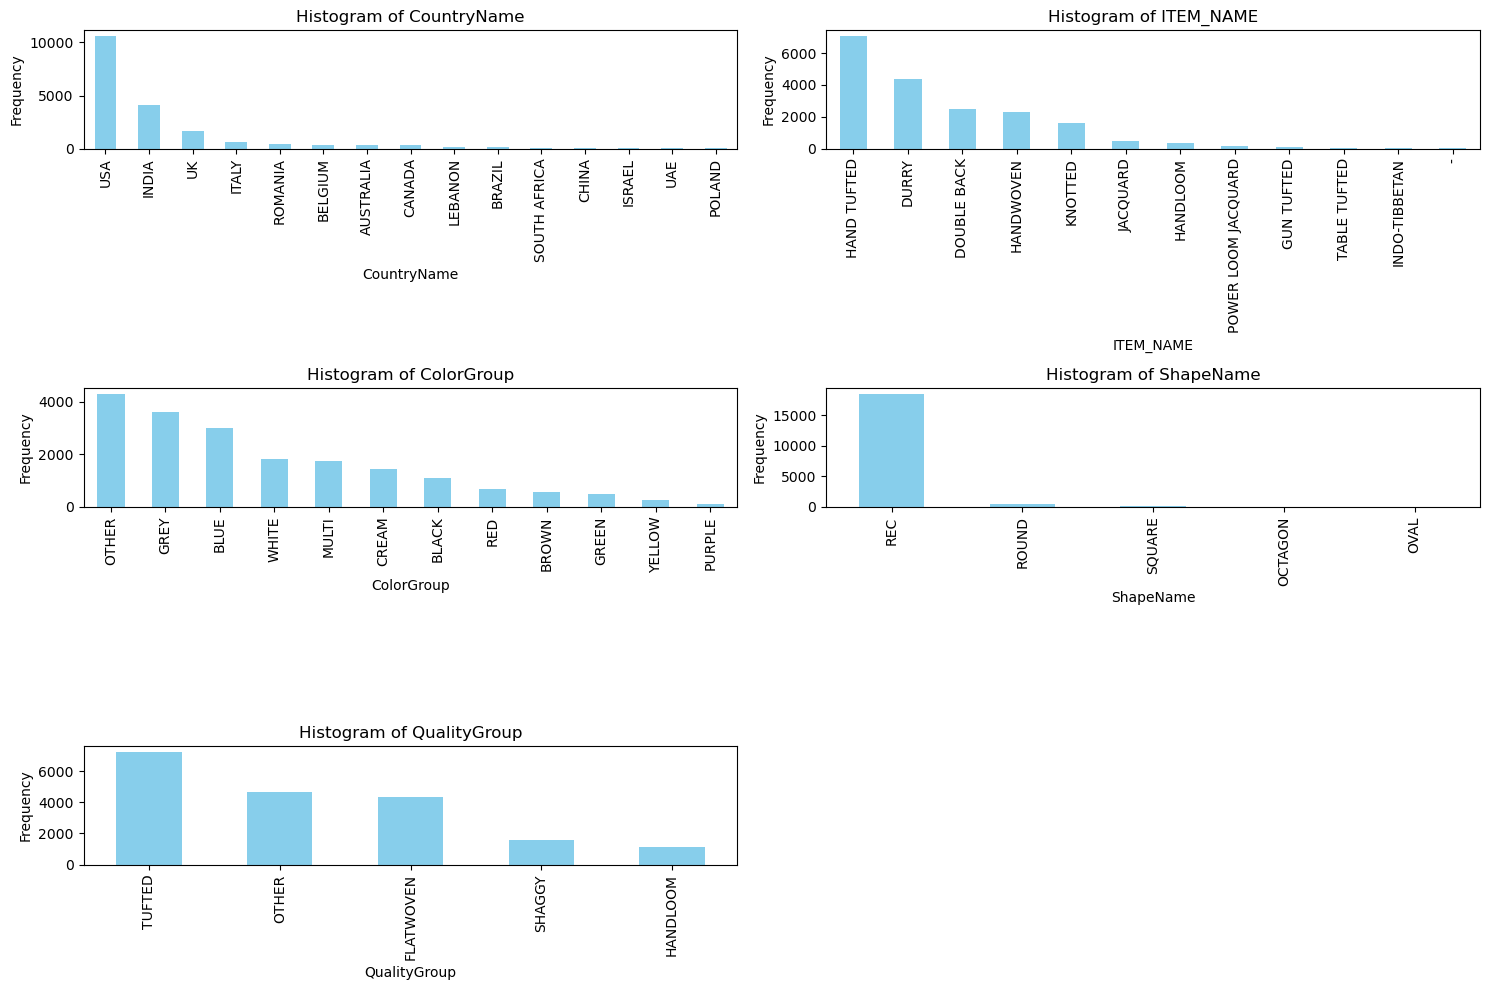

In [20]:
features_to_plot = ['CountryName', 'ITEM_NAME', 'ColorGroup', 'ShapeName', 'QualityGroup']

# Plot histograms for each feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    dfn3[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Encoding Features:
- 1: Frequency encoding used for ITEM_NAME, ShapeName and CountryName because of the high Skewness of data
- 2: General encoding used for others

In [21]:

# Frequency encoding for 'ShapeName'
shape_name_counts = dfn3['ShapeName'].value_counts()
dfn3['ShapeName_freq_encoded'] = dfn3['ShapeName'].map(shape_name_counts)

# Frequency encoding for 'ITEM_NAME'
item_name_counts = dfn3['ITEM_NAME'].value_counts()
dfn3['ITEM_NAME_freq_encoded'] = dfn3['ITEM_NAME'].map(item_name_counts)

# Frequency encoding for 'CountryName'
item_name_counts = dfn3['CountryName'].value_counts()
dfn3['CountryName_freq_encoded'] = dfn3['CountryName'].map(item_name_counts)


In [22]:
dfn3.columns

Index(['OrderType', 'OrderCategory', 'CustomerCode', 'CountryName',
       'CustomerOrderNo', 'Custorderdate', 'UnitName', 'QtyRequired',
       'TotalArea', 'Amount', 'ITEM_NAME', 'MainQuality', 'DesignName',
       'ShapeName', 'AreaFt', 'ColorGroup', 'QualityGroup',
       'ShapeName_freq_encoded', 'ITEM_NAME_freq_encoded',
       'CountryName_freq_encoded'],
      dtype='object')

In [23]:
dfn3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18940 entries, 0 to 18939
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OrderType                 18940 non-null  object 
 1   OrderCategory             18940 non-null  object 
 2   CustomerCode              18940 non-null  object 
 3   CountryName               18940 non-null  object 
 4   CustomerOrderNo           18940 non-null  object 
 5   Custorderdate             18940 non-null  object 
 6   UnitName                  18940 non-null  object 
 7   QtyRequired               18940 non-null  int64  
 8   TotalArea                 18940 non-null  float64
 9   Amount                    18940 non-null  float64
 10  ITEM_NAME                 18940 non-null  object 
 11  MainQuality               18940 non-null  object 
 12  DesignName                18940 non-null  object 
 13  ShapeName                 18940 non-null  object 
 14  AreaFt

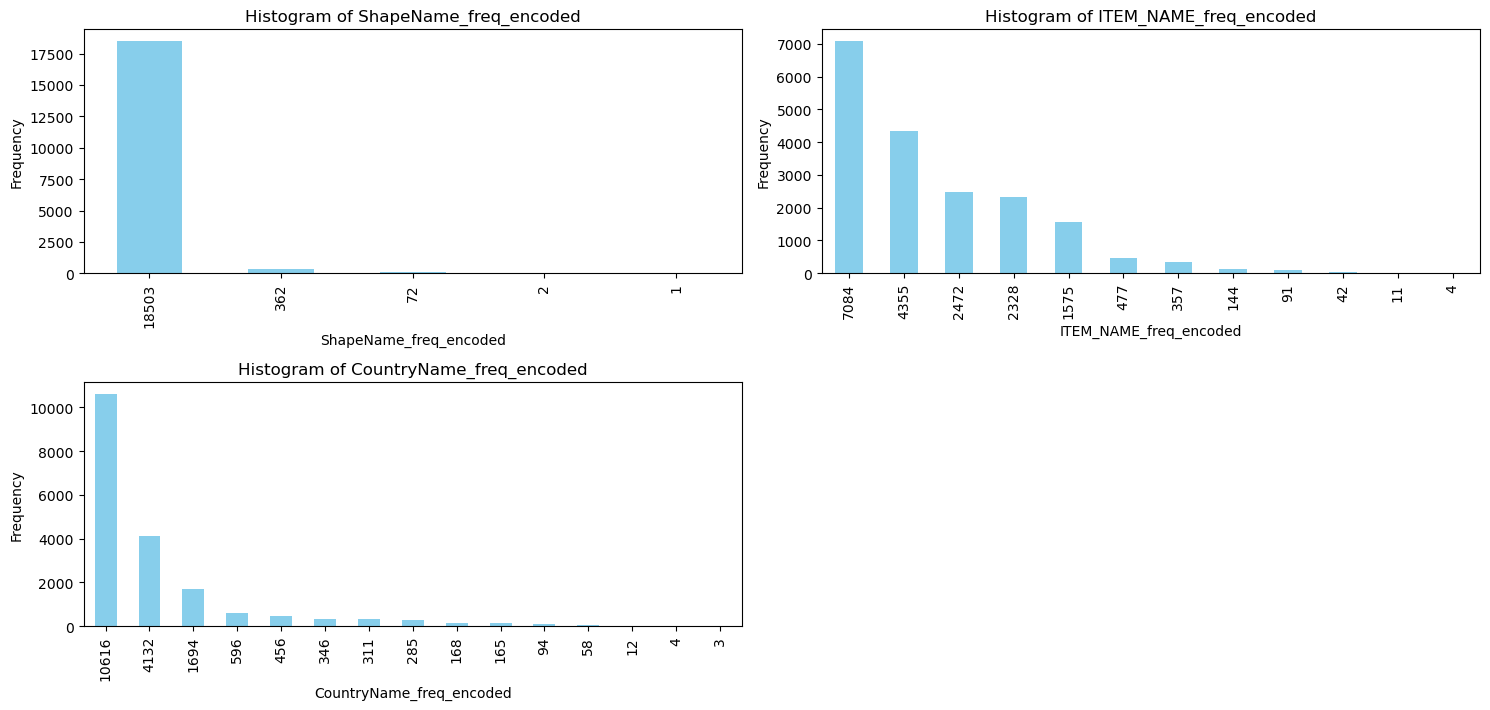

In [24]:
features_to_plot = ['ShapeName_freq_encoded', 'ITEM_NAME_freq_encoded', 'CountryName_freq_encoded']

# Plot histograms for each feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    dfn3[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- there are three new columns, 'ShapeName_freq_encoded' , 'CountryName_freq-encoded' and 'ITEM_NAME_freq_encoded', containing the frequency-encoded values for each respective feature.

In [25]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'flexibility' and 'difficulty' are categorical columns in your DataFrame
columns_to_label_encode = ['OrderType', 'OrderCategory', 'ColorGroup', 'QualityGroup']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Create a dictionary to store the mapping of encoded values to original names
encoding_mapping = {}

# Apply label encoding to each specified column and store the mapping
for column in columns_to_label_encode:
    dfn3[column] = label_encoder.fit_transform(dfn3[column])
    encoding_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

    # Print the mapping for the current column
    print(f"\nMapping for {column}:")
    for encoded_value, original_name in encoding_mapping[column].items():
        print(f"{encoded_value} -> {original_name}")

# Now, df contains the label-encoded values for specified columns
# encoding_mapping contains dictionaries with mappings for each column
# Save the changes to the main dataset if needed
dfn3.to_csv('encoded4.csv', index=False)



Mapping for OrderType:
Area Wise -> 0
Pc Wise -> 1

Mapping for OrderCategory:
Order -> 0
Sample -> 1

Mapping for ColorGroup:
BLACK -> 0
BLUE -> 1
BROWN -> 2
CREAM -> 3
GREEN -> 4
GREY -> 5
MULTI -> 6
OTHER -> 7
PURPLE -> 8
RED -> 9
WHITE -> 10
YELLOW -> 11

Mapping for QualityGroup:
FLATWOVEN -> 0
HANDLOOM -> 1
OTHER -> 2
SHAGGY -> 3
TUFTED -> 4


In [26]:
dfn4=pd.read_csv('encoded4.csv')

In [27]:
dfn4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18940 entries, 0 to 18939
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OrderType                 18940 non-null  int64  
 1   OrderCategory             18940 non-null  int64  
 2   CustomerCode              18940 non-null  object 
 3   CountryName               18940 non-null  object 
 4   CustomerOrderNo           18940 non-null  object 
 5   Custorderdate             18940 non-null  object 
 6   UnitName                  18940 non-null  object 
 7   QtyRequired               18940 non-null  int64  
 8   TotalArea                 18940 non-null  float64
 9   Amount                    18940 non-null  float64
 10  ITEM_NAME                 18940 non-null  object 
 11  MainQuality               18940 non-null  object 
 12  DesignName                18940 non-null  object 
 13  ShapeName                 18940 non-null  object 
 14  AreaFt

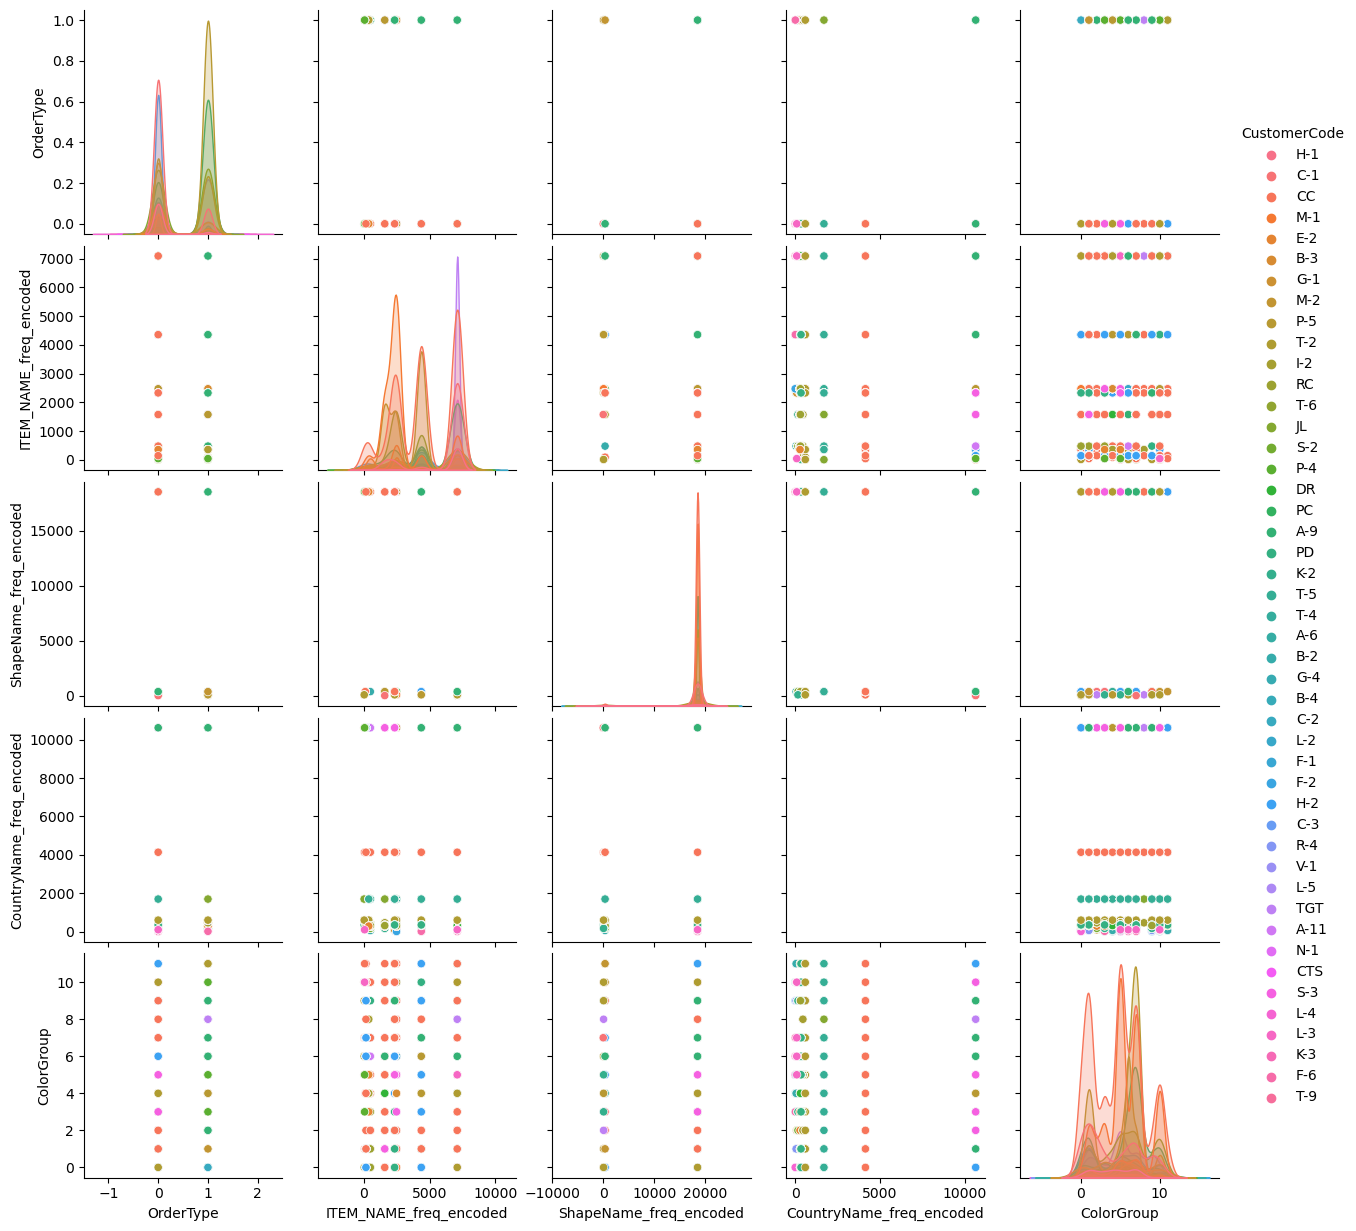

In [27]:
sns.pairplot(dfn4,hue='CustomerCode',vars=['OrderType', 'ITEM_NAME_freq_encoded','ShapeName_freq_encoded',
                                          'CountryName_freq_encoded' ,'ColorGroup'])
plt.savefig('pairplot2.png')
plt.show()

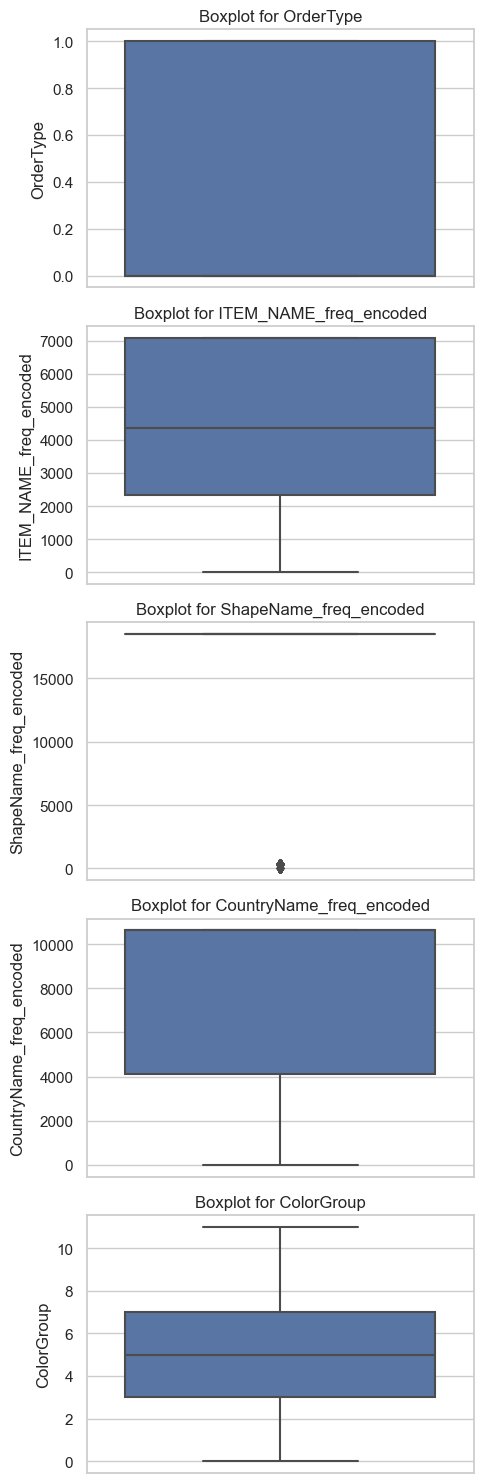

In [29]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Define the features for which you want to draw boxplots
outlier_features = ['OrderType', 'ITEM_NAME_freq_encoded', 'ShapeName_freq_encoded', 'CountryName_freq_encoded', 'ColorGroup']

# Create subplots
fig, axes = plt.subplots(nrows=len(outlier_features), ncols=1, figsize=(5, 15))

# Draw boxplots for each feature
for i, feature in enumerate(outlier_features):
    sns.boxplot(y=dfn4[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot for {feature}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [28]:
# Assuming dfn4 is your DataFrame
# Calculate the IQR for 'ShapeName_freq_encoded'
Q1 = dfn4['ShapeName_freq_encoded'].quantile(0.25)
Q3 = dfn4['ShapeName_freq_encoded'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
dfn4_no_outliers = dfn4[(dfn4['ShapeName_freq_encoded'] >= lower_bound) & (dfn4['ShapeName_freq_encoded'] <= upper_bound)]



In [29]:
dfn4_no_outliers.to_csv('No_outlier.csv', index=False)
dfn4n=pd.read_csv('No_outlier.csv')

### Classification Models:

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features and target variable
X = dfn4n[['OrderType','ShapeName_freq_encoded','ITEM_NAME_freq_encoded', 
          'OrderCategory','CountryName_freq_encoded', 'ColorGroup','QualityGroup']]
y = dfn4n['CustomerCode']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# KNN
knn_model = KNeighborsClassifier()
knn_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Print the results
print("Decision Tree - Cross-Validation Accuracy Scores:", dt_scores)
print("Decision Tree - Test Accuracy:", dt_accuracy)
print("\nRandom Forest - Cross-Validation Accuracy Scores:", rf_scores)
print("Random Forest - Test Accuracy:", rf_accuracy)
print("\nKNN - Cross-Validation Accuracy Scores:", knn_scores)
print("KNN - Test Accuracy:", knn_accuracy)


C:\Users\negar\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree - Cross-Validation Accuracy Scores: [0.7710233  0.76933468 0.76216216 0.76722973 0.7722973 ]
Decision Tree - Test Accuracy: 0.7673601729262362

Random Forest - Cross-Validation Accuracy Scores: [0.76899696 0.76595745 0.75945946 0.76790541 0.76858108]
Random Forest - Test Accuracy: 0.7654687922183194

KNN - Cross-Validation Accuracy Scores: [0.70010132 0.73150963 0.69932432 0.72635135 0.72668919]
KNN - Test Accuracy: 0.7227776276681978


### Further Analysis
- Making Group fo CustomerCode

In [31]:
customer_code_mapping = {
    'A': ['A-9', 'A-6', 'A-11'],
    'B': ['B-3', 'B-2', 'B-4'],
    'C':['C-1', 'CC', 'RC', 'PC', 'C-2', 'C-3', 'CTS'],
    'E': ['E-2'],
    'F': ['F-1', 'F-2', 'F-6'],
    'G': ['G-1', 'G-4',],
    'H':['H-1', 'H-2'],
    'I': ['I-2'],
    'K':['K-2','K-3'],
    'L':['JL', 'L-2', 'L-5', 'L-4', 'L-3'],
    'M':['M-1', 'M-2'],
    'N':['N-1'],
    'P':['P-5', 'P-4'],
    'R':['R-4'],
    'S':['S-3','S-2'],
    'T':['T-6','T-9','T-4','T-4','T-5','T-2'],
    'V':['V-1']
}
def assign_main_customer_code(customer_code):
    for group, values in customer_code_mapping.items():
        if customer_code in values:
            return group
    return customer_code

# Apply the function to create a new column 'QualityGroup'
dfn4n['MainCustomerCode'] = dfn4n['CustomerCode'].apply(assign_main_customer_code)

# Create a new dataset with the relevant columns
grouped_CustomerCode_data = dfn4n[['OrderType', 'OrderCategory', 'MainCustomerCode', 'CountryName',
                             'CustomerOrderNo', 'Custorderdate', 'UnitName', 'QtyRequired',
                             'TotalArea', 'Amount', 'ITEM_NAME', 'QualityGroup', 'DesignName',
                             'ShapeName', 'AreaFt', 'ColorGroup','ShapeName_freq_encoded',
                                  'ITEM_NAME_freq_encoded', 'CountryName_freq_encoded']].copy()

In [32]:
## Showing the unique value of each column

selected_columns = ["MainCustomerCode"]

for column in selected_columns:
    unique_values = dfn4n[column].unique()
    num_unique_values = len(unique_values)
    print(f"{column} ({num_unique_values} unique values):\n{unique_values}\n")

# Display the total number of unique values for each column
unique_value_counts = dfn4n[selected_columns].nunique()
print("Total number of unique values for each column:")
print(unique_value_counts)

MainCustomerCode (20 unique values):
['H' 'C' 'M' 'E' 'B' 'G' 'P' 'T' 'I' 'L' 'S' 'DR' 'A' 'PD' 'K' 'F' 'R' 'V'
 'TGT' 'N']

Total number of unique values for each column:
MainCustomerCode    20
dtype: int64


In [33]:
dfn4n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18503 entries, 0 to 18502
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OrderType                 18503 non-null  int64  
 1   OrderCategory             18503 non-null  int64  
 2   CustomerCode              18503 non-null  object 
 3   CountryName               18503 non-null  object 
 4   CustomerOrderNo           18503 non-null  object 
 5   Custorderdate             18503 non-null  object 
 6   UnitName                  18503 non-null  object 
 7   QtyRequired               18503 non-null  int64  
 8   TotalArea                 18503 non-null  float64
 9   Amount                    18503 non-null  float64
 10  ITEM_NAME                 18503 non-null  object 
 11  MainQuality               18503 non-null  object 
 12  DesignName                18503 non-null  object 
 13  ShapeName                 18503 non-null  object 
 14  AreaFt

In [34]:
dfn4n.to_csv('GroupedDataset.csv', index=False)


In [35]:
dfn5=pd.read_csv('GroupedDataset.csv')

In [36]:
dfn5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18503 entries, 0 to 18502
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OrderType                 18503 non-null  int64  
 1   OrderCategory             18503 non-null  int64  
 2   CustomerCode              18503 non-null  object 
 3   CountryName               18503 non-null  object 
 4   CustomerOrderNo           18503 non-null  object 
 5   Custorderdate             18503 non-null  object 
 6   UnitName                  18503 non-null  object 
 7   QtyRequired               18503 non-null  int64  
 8   TotalArea                 18503 non-null  float64
 9   Amount                    18503 non-null  float64
 10  ITEM_NAME                 18503 non-null  object 
 11  MainQuality               18503 non-null  object 
 12  DesignName                18503 non-null  object 
 13  ShapeName                 18503 non-null  object 
 14  AreaFt

In [37]:
selected_columns = ["MainCustomerCode"]

for column in selected_columns:
    unique_values = dfn5[column].unique()
    num_unique_values = len(unique_values)
    print(f"{column} ({num_unique_values} unique values):\n{unique_values}\n")

# Display the total number of unique values for each column
unique_value_counts = dfn5[selected_columns].nunique()
print("Total number of unique values for each column:")
print(unique_value_counts)

MainCustomerCode (20 unique values):
['H' 'C' 'M' 'E' 'B' 'G' 'P' 'T' 'I' 'L' 'S' 'DR' 'A' 'PD' 'K' 'F' 'R' 'V'
 'TGT' 'N']

Total number of unique values for each column:
MainCustomerCode    20
dtype: int64


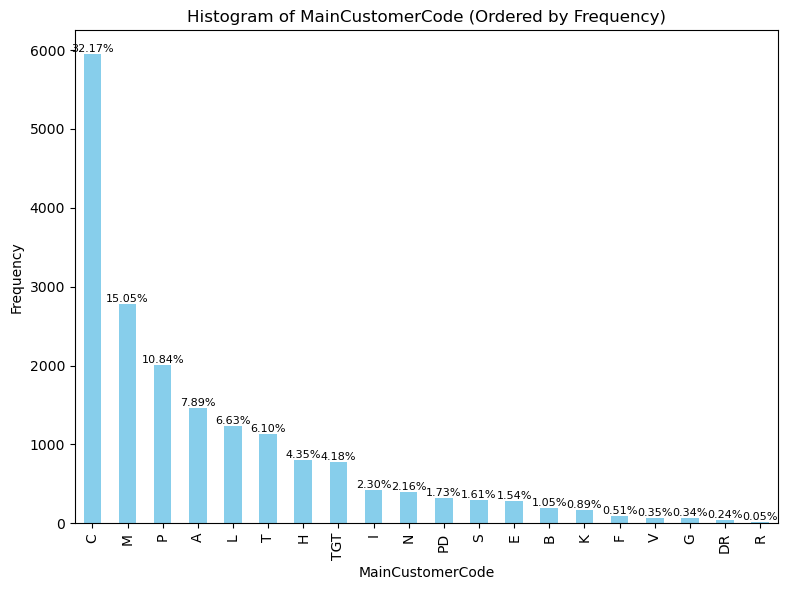

In [38]:
import matplotlib.pyplot as plt

# Assuming dfn5 is your DataFrame
plt.figure(figsize=(8, 6))

# Calculate the frequencies of MainCustomerCode
main_customer_code_frequencies = dfn5['MainCustomerCode'].value_counts().sort_values(ascending=False)

# Plot the histogram
main_customer_code_frequencies.plot(kind='bar', color='skyblue')

# Display the percentage on each bar
total_records = len(dfn5['MainCustomerCode'])
for i, count in enumerate(main_customer_code_frequencies):
    percentage = count / total_records * 100
    plt.text(i, count + 0.1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)

plt.title('Histogram of MainCustomerCode (Ordered by Frequency)')
plt.xlabel('MainCustomerCode')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Improving Balancing in Classes

In [39]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


### Classes which has more than 3% Balance Ratio are:
- C class
- M Class
- P Class
- A Class
- T Class
- L Class
- H Class
- TGT Class
##### SMOTE Used to improve the balancing, different classification models tried abain:

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Separate features and target variable
X = dfn5[['OrderType','ShapeName_freq_encoded','ITEM_NAME_freq_encoded', 
          'OrderCategory','CountryName_freq_encoded', 'ColorGroup','QualityGroup']]
y = dfn5['MainCustomerCode']


# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE to balance the specified classes
smote_classes = ['C', 'M', 'P', 'A', 'T', 'L', 'H', 'TGT']
sampling_strategy = {cls: max(y_train.value_counts()) for cls in smote_classes}
smote = SMOTE(sampling_strategy=sampling_strategy)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Continue with the rest of your code (Steps 4 to 7)
# Step 4: Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_resampled, y_train_resampled)

# Step 5: Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)

# Step 6: Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 7: Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}\n')

# Evaluate Decision Tree model
evaluate_model(dt_model, X_test, y_test)

# Evaluate KNN model
evaluate_model(knn_model, X_test, y_test)

# Evaluate Random Forest model
evaluate_model(rf_model, X_test, y_test)

Model: DecisionTreeClassifier
Accuracy: 0.7468251823831397
Classification Report:
              precision    recall  f1-score   support

           A       0.61      0.52      0.56       299
           B       0.79      0.26      0.39        43
           C       0.98      0.76      0.86      1181
          DR       1.00      0.86      0.92         7
           E       1.00      1.00      1.00        59
           F       0.75      0.14      0.23        22
           G       1.00      1.00      1.00        12
           H       0.25      0.77      0.38       151
           I       1.00      1.00      1.00        86
           K       1.00      1.00      1.00        25
           L       0.96      0.89      0.92       263
           M       0.83      0.77      0.80       561
           N       0.17      0.01      0.02        86
           P       0.78      0.79      0.78       410
          PD       1.00      1.00      1.00        64
           R       1.00      0.33      0.50         3

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: KNeighborsClassifier
Accuracy: 0.7557416914347473
Classification Report:
              precision    recall  f1-score   support

           A       0.50      0.62      0.56       299
           B       0.52      0.28      0.36        43
           C       0.81      0.86      0.83      1181
          DR       0.35      0.86      0.50         7
           E       1.00      0.98      0.99        59
           F       0.56      0.23      0.32        22
           G       1.00      1.00      1.00        12
           H       0.31      0.40      0.35       151
           I       1.00      1.00      1.00        86
           K       1.00      1.00      1.00        25
           L       0.90      0.92      0.91       263
           M       0.81      0.75      0.78       561
           N       0.36      0.28      0.31        86
           P       0.77      0.75      0.76       410
          PD       0.98      0.98      0.98        64
           R       0.00      0.00      0.00         3
 

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metr

Classification Report:
              precision    recall  f1-score   support

           A       0.61      0.52      0.56       299
           B       0.83      0.23      0.36        43
           C       0.98      0.76      0.86      1181
          DR       1.00      0.86      0.92         7
           E       1.00      0.98      0.99        59
           F       0.75      0.14      0.23        22
           G       1.00      1.00      1.00        12
           H       0.25      0.76      0.38       151
           I       1.00      1.00      1.00        86
           K       1.00      1.00      1.00        25
           L       0.96      0.88      0.92       263
           M       0.83      0.77      0.80       561
           N       0.17      0.01      0.02        86
           P       0.78      0.79      0.78       410
          PD       0.97      1.00      0.98        64
           R       0.50      0.33      0.40         3
           S       0.90      0.71      0.79        62
    

### Feature Importance
- Using Randomforest to find the most important features, run the model again according to new combination of features:

In [51]:
dfn5.columns

Index(['OrderType', 'OrderCategory', 'CustomerCode', 'CountryName',
       'CustomerOrderNo', 'Custorderdate', 'UnitName', 'QtyRequired',
       'TotalArea', 'Amount', 'ITEM_NAME', 'MainQuality', 'DesignName',
       'ShapeName', 'AreaFt', 'ColorGroup', 'QualityGroup',
       'ShapeName_freq_encoded', 'ITEM_NAME_freq_encoded',
       'CountryName_freq_encoded', 'MainCustomerCode'],
      dtype='object')

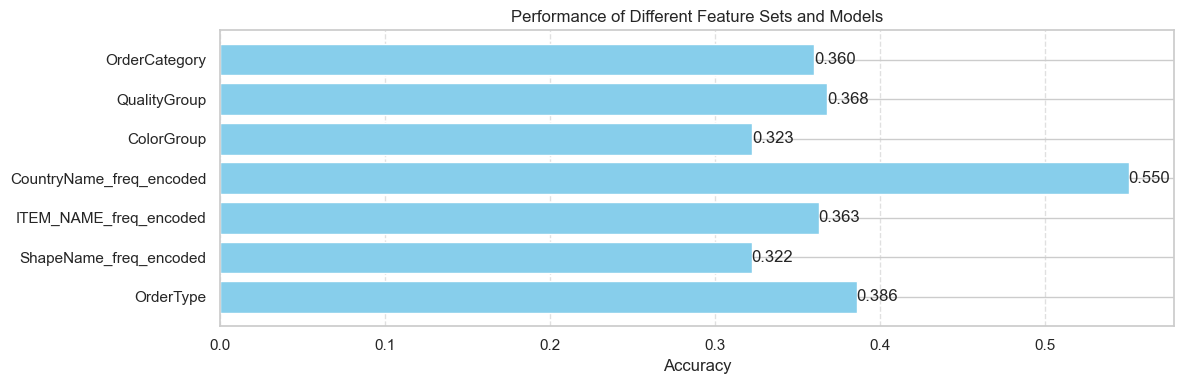

In [51]:
feature_sets =[['OrderType'], ['ShapeName_freq_encoded'], ['ITEM_NAME_freq_encoded'],
                ['CountryName_freq_encoded'], ['ColorGroup'], ['QualityGroup'],['OrderCategory']]

# Define hyperparameters (replace with your specific hyperparameter values)
hyperparameters = {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}

# Define lists to store results
feature_set_names = []  # Names of feature sets
accuracy_scores = []    # Accuracy scores for each try

# Assume you have X_train, y_train defined

# Iterate over feature sets
for features in feature_sets:
    X_train_subset = X_train[features]
    
    # Iterate over hyperparameters
    clf = DecisionTreeClassifier(**hyperparameters)
    
    # Evaluate the model using cross-validation
    scores = cross_val_score(clf, X_train_subset, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
        
    # Store the results
    feature_set_names.append(', '.join(features))
    accuracy_scores.append(mean_score)

# Create a bar chart to visualize the results
plt.figure(figsize=(12, 4))
bars = plt.barh(feature_set_names, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Performance of Different Feature Sets and Models')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add text annotations
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.3f}', va='center')

plt.tight_layout()

# Show the plot
plt.show()


#### Removing features with less than 0.33 importance (ColorGroup & ShapeNAme)

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming dfn5 is your DataFrame
X = dfn5[['OrderType', 'ITEM_NAME_freq_encoded', 'CountryName_freq_encoded', 'OrderCategory','QualityGroup']]
y = dfn5['MainCustomerCode']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE to balance the specified classes
smote_classes = ['C', 'M', 'P', 'A', 'T', 'L', 'H', 'TGT']
sampling_strategy = {cls: max(y_train.value_counts()) for cls in smote_classes}
smote = SMOTE(sampling_strategy=sampling_strategy)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Continue with the rest of your code (Steps 4 to 7)
# Step 4: Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_resampled, y_train_resampled)

# Step 5: Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)

# Step 6: Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 7: Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}\n')

# Evaluate Decision Tree model
evaluate_model(dt_model, X_test, y_test)

# Evaluate KNN model
evaluate_model(knn_model, X_test, y_test)

# Evaluate Random Forest model
evaluate_model(rf_model, X_test, y_test)



Model: DecisionTreeClassifier
Accuracy: 0.6881923804377196
Classification Report:
              precision    recall  f1-score   support

           A       0.52      0.08      0.14       299
           B       0.79      0.26      0.39        43
           C       0.99      0.72      0.83      1181
          DR       0.00      0.00      0.00         7
           E       1.00      1.00      1.00        59
           F       1.00      0.05      0.09        22
           G       1.00      1.00      1.00        12
           H       0.21      0.83      0.33       151
           I       1.00      1.00      1.00        86
           K       1.00      1.00      1.00        25
           L       0.98      0.83      0.90       263
           M       0.77      0.76      0.77       561
           N       0.00      0.00      0.00        86
           P       0.70      0.69      0.69       410
          PD       1.00      0.97      0.98        64
           R       0.00      0.00      0.00         3

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: KNeighborsClassifier
Accuracy: 0.7206160497162929
Classification Report:
              precision    recall  f1-score   support

           A       0.37      0.56      0.45       299
           B       0.79      0.26      0.39        43
           C       0.84      0.86      0.85      1181
          DR       0.21      0.86      0.34         7
           E       1.00      0.98      0.99        59
           F       0.00      0.00      0.00        22
           G       1.00      1.00      1.00        12
           H       0.25      0.32      0.28       151
           I       1.00      1.00      1.00        86
           K       1.00      1.00      1.00        25
           L       0.98      0.82      0.89       263
           M       0.77      0.76      0.77       561
           N       0.28      0.55      0.37        86
           P       0.74      0.59      0.65       410
          PD       0.95      0.98      0.97        64
           R       0.00      0.00      0.00         3
 

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metr

Classification Report:
              precision    recall  f1-score   support

           A       0.52      0.08      0.14       299
           B       0.79      0.26      0.39        43
           C       1.00      0.71      0.83      1181
          DR       0.32      0.86      0.46         7
           E       1.00      1.00      1.00        59
           F       1.00      0.05      0.09        22
           G       1.00      1.00      1.00        12
           H       0.21      0.83      0.33       151
           I       1.00      1.00      1.00        86
           K       1.00      1.00      1.00        25
           L       0.98      0.83      0.90       263
           M       0.77      0.76      0.77       561
           N       0.00      0.00      0.00        86
           P       0.70      0.69      0.69       410
          PD       1.00      0.97      0.98        64
           R       0.00      0.00      0.00         3
           S       1.00      0.65      0.78        62
    

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Conclusion:
by decreasing the mentioned features, the accuracy of models decreased, so we prefer to keep them in our model, Also We add "Amount" and "QtyRequired' features to the model

In [61]:
dfn5.columns

Index(['OrderType', 'OrderCategory', 'CustomerCode', 'CountryName',
       'CustomerOrderNo', 'Custorderdate', 'UnitName', 'QtyRequired',
       'TotalArea', 'Amount', 'ITEM_NAME', 'MainQuality', 'DesignName',
       'ShapeName', 'AreaFt', 'ColorGroup', 'QualityGroup',
       'ShapeName_freq_encoded', 'ITEM_NAME_freq_encoded',
       'CountryName_freq_encoded', 'MainCustomerCode'],
      dtype='object')

In [44]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = dfn5[['OrderType', 'ITEM_NAME_freq_encoded', 'CountryName_freq_encoded', 'OrderCategory',
          'QualityGroup','Amount','QtyRequired', 'ColorGroup','ShapeName_freq_encoded']]
y = dfn5['MainCustomerCode']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply SMOTE to balance the specified classes
smote_classes = ['C', 'M', 'P', 'A', 'T', 'L', 'H', 'TGT']
sampling_strategy = {cls: max(y_train.value_counts()) for cls in smote_classes}
smote = SMOTE(sampling_strategy=sampling_strategy)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Continue with the rest of your code (Steps 4 to 7)
# Step 4: Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_resampled, y_train_resampled)

# Step 5: Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)

# Step 6: Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 7: Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}\n')

# Evaluate Decision Tree model
evaluate_model(dt_model, X_test, y_test)

# Evaluate KNN model
evaluate_model(knn_model, X_test, y_test)

# Evaluate Random Forest model
evaluate_model(rf_model, X_test, y_test)


Model: DecisionTreeClassifier
Accuracy: 0.8338286949473115
Classification Report:
              precision    recall  f1-score   support

           A       0.57      0.61      0.59       299
           B       0.74      0.72      0.73        43
           C       0.95      0.88      0.91      1181
          DR       0.70      1.00      0.82         7
           E       1.00      1.00      1.00        59
           F       0.67      0.45      0.54        22
           G       1.00      1.00      1.00        12
           H       0.57      0.75      0.65       151
           I       1.00      1.00      1.00        86
           K       1.00      1.00      1.00        25
           L       0.94      0.94      0.94       263
           M       0.85      0.81      0.83       561
           N       0.83      0.57      0.68        86
           P       0.81      0.79      0.80       410
          PD       1.00      1.00      1.00        64
           R       1.00      1.00      1.00         3

## Clustering

In [66]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = dfn5[['OrderType', 'ITEM_NAME_freq_encoded', 'CountryName_freq_encoded', 'OrderCategory',
          'QualityGroup','Amount','QtyRequired', 'ColorGroup','ShapeName_freq_encoded']]

# Standardize features using StandardScaler
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X)

# Choose the number of clusters (you may need to experiment with this)
num_clusters = 8

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features_standardized)

# Add cluster labels to the DataFrame
dfn5['Cluster'] = clusters

# Display the results
print(dfn6[['MainCustomerCode', 'Cluster']])


C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      MainCustomerCode  Cluster
0                    H        4
1                    H        4
2                    H        4
3                    H        4
4                    H        4
...                ...      ...
18507                T        3
18508                T        3
18509                T        3
18510                A        3
18511                C        3

[18512 rows x 2 columns]


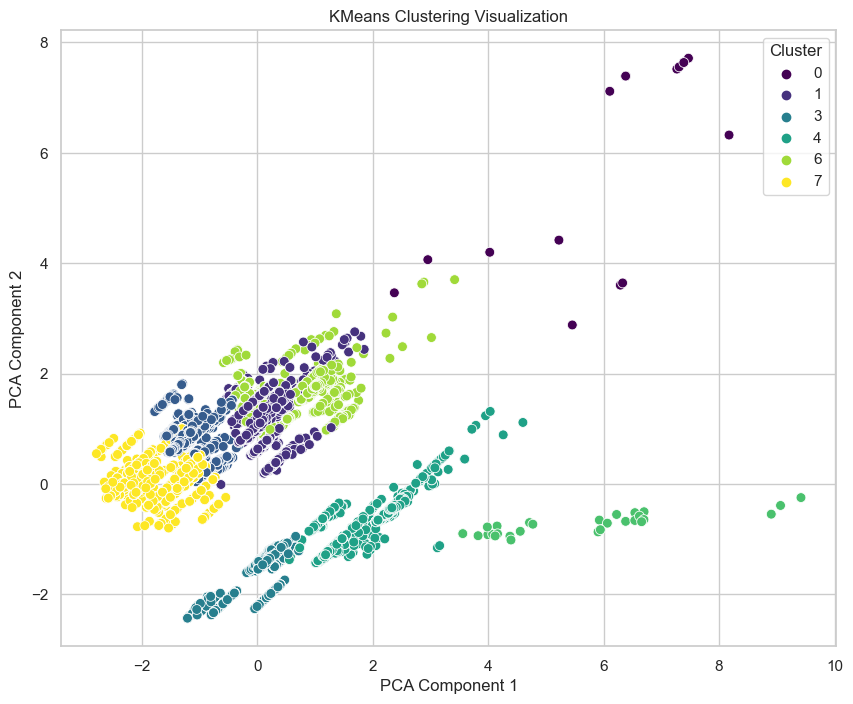

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_standardized)

# Add PCA components to the DataFrame
dfn5['PCA1'] = features_pca[:, 0]
dfn5['PCA2'] = features_pca[:, 1]

# Plot clusters using scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=dfn5, palette='viridis', s=50)
plt.title('KMeans Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [69]:
from sklearn.metrics import silhouette_score

# Assuming 'features_standardized' and 'clusters' are already defined
silhouette_avg = silhouette_score(features_standardized, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.34


C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\clust

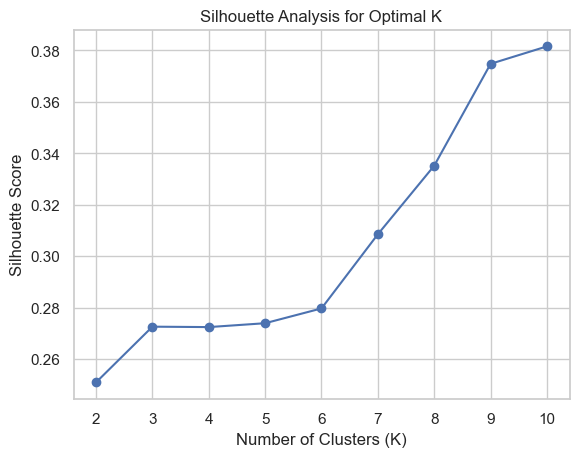

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Assuming features_standardized contains your standardized features
# You may need to replace it with the appropriate variable in your code
features_standardized = scaler.fit_transform(X)

# Set a range of K values to try
k_values = range(2, 11)  # You can adjust the range based on your dataset

# Store silhouette scores for each K
silhouette_scores = []

for k in k_values:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(features_standardized)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(features_standardized, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()


### Run the model for K=10

In [72]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = dfn5[['OrderType', 'ITEM_NAME_freq_encoded', 'CountryName_freq_encoded', 'OrderCategory',
          'QualityGroup','Amount','QtyRequired', 'ColorGroup','ShapeName_freq_encoded']]

# Standardize features using StandardScaler
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X)

# Choose the number of clusters (you may need to experiment with this)
num_clusters = 10

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features_standardized)

# Add cluster labels to the DataFrame
dfn5['Cluster'] = clusters

# Display the results
print(dfn6[['MainCustomerCode', 'Cluster']])


C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      MainCustomerCode  Cluster
0                    H        4
1                    H        4
2                    H        4
3                    H        4
4                    H        4
...                ...      ...
18507                T        3
18508                T        3
18509                T        3
18510                A        3
18511                C        3

[18512 rows x 2 columns]


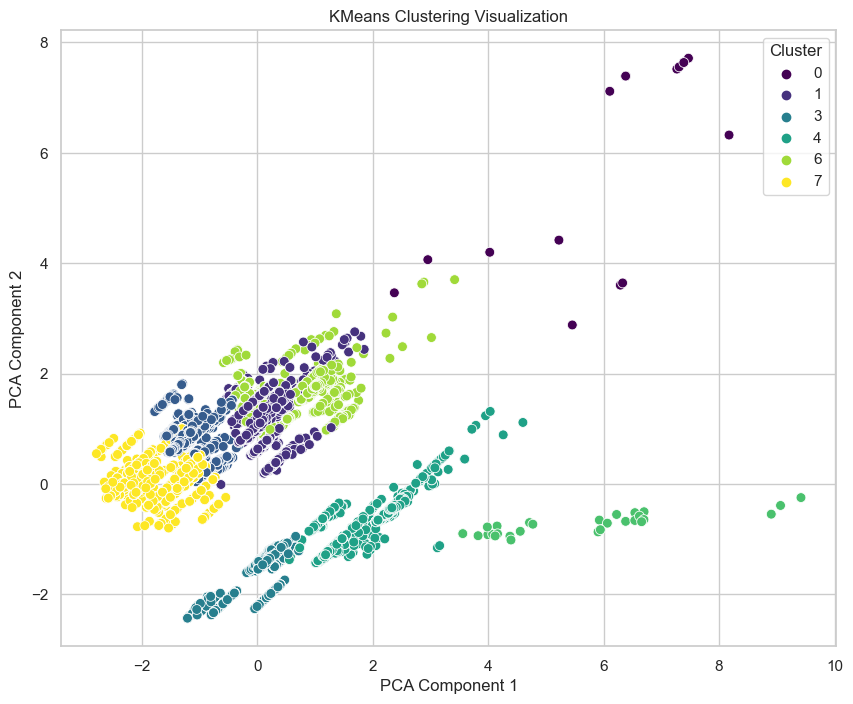

In [73]:

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_standardized)

# Add PCA components to the DataFrame
dfn6['PCA1'] = features_pca[:, 0]
dfn6['PCA2'] = features_pca[:, 1]

# Plot clusters using scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=dfn6, palette='viridis', s=50)
plt.title('KMeans Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [74]:
from sklearn.metrics import silhouette_score

# Assuming 'features_standardized' and 'clusters' are already defined
silhouette_avg = silhouette_score(features_standardized, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.38


### Neural Network

In [94]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [76]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

# Assuming dfn5 is your DataFrame

X = dfn5[['OrderType', 'ITEM_NAME_freq_encoded', 'CountryName_freq_encoded', 'OrderCategory',
          'QualityGroup','Amount','QtyRequired', 'ColorGroup','ShapeName_freq_encoded']]
y = dfn5['MainCustomerCode']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target variable to categorical (one-hot encoding)
y_train_categorical = tf.keras.utils.to_categorical(y_train)
y_test_categorical = tf.keras.utils.to_categorical(y_test)

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_categorical, epochs=10, validation_data=(X_test_scaled, y_test_categorical), verbose=2)

# Make predictions
y_pred_categorical = model.predict(X_test_scaled)
y_pred = tf.argmax(y_pred_categorical, axis=1)

# Convert predictions to the same data type as y_test (integer)
y_pred_labels = y_pred.numpy()

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_labels))


Epoch 1/10
463/463 - 2s - loss: 1.5703 - accuracy: 0.5379 - val_loss: 1.2033 - val_accuracy: 0.6130 - 2s/epoch - 5ms/step
Epoch 2/10
463/463 - 1s - loss: 1.1553 - accuracy: 0.6094 - val_loss: 1.0979 - val_accuracy: 0.6298 - 1s/epoch - 2ms/step
Epoch 3/10
463/463 - 1s - loss: 1.0860 - accuracy: 0.6304 - val_loss: 1.0642 - val_accuracy: 0.6430 - 1s/epoch - 2ms/step
Epoch 4/10
463/463 - 1s - loss: 1.0473 - accuracy: 0.6399 - val_loss: 1.0318 - val_accuracy: 0.6497 - 1s/epoch - 2ms/step
Epoch 5/10
463/463 - 1s - loss: 1.0195 - accuracy: 0.6522 - val_loss: 1.0150 - val_accuracy: 0.6697 - 1s/epoch - 2ms/step
Epoch 6/10
463/463 - 1s - loss: 0.9980 - accuracy: 0.6655 - val_loss: 0.9901 - val_accuracy: 0.6870 - 1s/epoch - 2ms/step
Epoch 7/10
463/463 - 1s - loss: 0.9811 - accuracy: 0.6744 - val_loss: 0.9697 - val_accuracy: 0.6943 - 1s/epoch - 3ms/step
Epoch 8/10
463/463 - 1s - loss: 0.9672 - accuracy: 0.6784 - val_loss: 0.9677 - val_accuracy: 0.6832 - 1s/epoch - 2ms/step
Epoch 9/10
463/463 - 1s 

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Time Series

In [77]:
dfn5.to_csv('Timeseries.csv', index=False)


In [78]:
dfn7= pd.read_csv('Timeseries.csv')

In [79]:
dfn7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18512 entries, 0 to 18511
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OrderType                 18512 non-null  int64  
 1   OrderCategory             18512 non-null  int64  
 2   CustomerCode              18512 non-null  object 
 3   CountryName               18512 non-null  object 
 4   CustomerOrderNo           18503 non-null  object 
 5   Custorderdate             18512 non-null  object 
 6   UnitName                  18512 non-null  object 
 7   QtyRequired               18512 non-null  int64  
 8   TotalArea                 18512 non-null  float64
 9   Amount                    18512 non-null  float64
 10  ITEM_NAME                 18512 non-null  object 
 11  MainQuality               18512 non-null  object 
 12  DesignName                18512 non-null  object 
 13  ShapeName                 18512 non-null  object 
 14  AreaFt

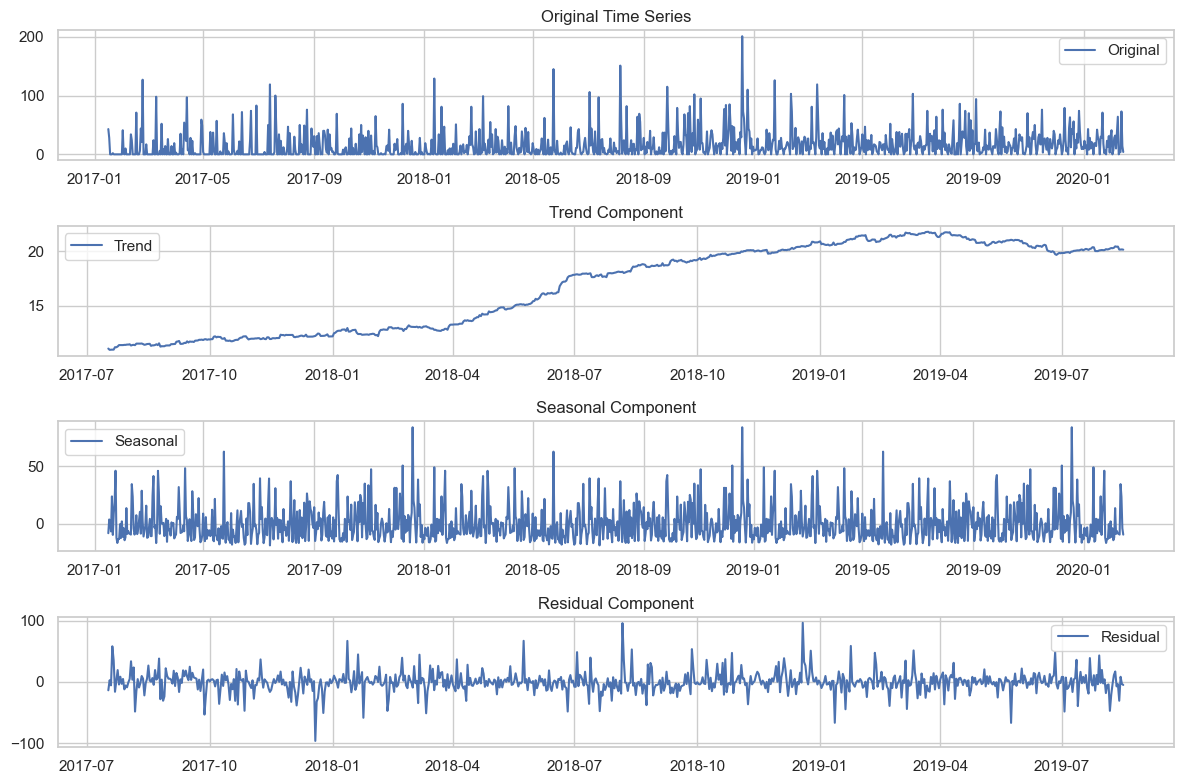

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming dfn7 is your DataFrame
# Make sure 'Custorderdate' is in datetime format
dfn7['Custorderdate'] = pd.to_datetime(dfn7['Custorderdate'])

# Set 'Custorderdate' as the index
dfn7 = dfn7.set_index('Custorderdate')

# Resample the data to daily frequency and count the number of orders per day
dfn7_daily = dfn7.resample('D').count()['QtyRequired'].fillna(0)

# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(dfn7_daily, model='additive', period=365)

# Plot the original time series
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(dfn7_daily, label='Original')
plt.title('Original Time Series')
plt.legend()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')
plt.legend()

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.legend()

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()


In [86]:
import pmdarima as pmd
autoarima_model = pmd.auto_arima(dfn7['QtyRequired'], seasonal = True, m=24, trace = True, max_iter = 15, stepwise = False, random = True, n_fits = 10)

 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=242454.450, Time=0.99 sec
 ARIMA(0,1,1)(1,0,1)[24] intercept   : AIC=237740.915, Time=155.55 sec
 ARIMA(2,1,1)(0,0,1)[24] intercept   : AIC=237663.210, Time=124.25 sec
 ARIMA(0,1,4)(0,0,0)[24] intercept   : AIC=237569.978, Time=18.72 sec
 ARIMA(0,1,3)(2,0,0)[24] intercept   : AIC=237693.327, Time=228.71 sec
 ARIMA(1,1,3)(0,0,1)[24] intercept   : AIC=inf, Time=234.65 sec
 ARIMA(0,1,2)(2,0,0)[24] intercept   : AIC=237749.669, Time=180.21 sec
 ARIMA(2,1,3)(0,0,0)[24] intercept   : AIC=inf, Time=35.05 sec


MemoryError: Unable to allocate 353. MiB for an array with shape (50, 50, 18513) and data type float64

In [88]:
import pmdarima as pmd

autoarima_model = pmd.auto_arima(dfn7['QtyRequired'], seasonal=True, m=24, trace=True, max_iter=15, stepwise=False, random=True, n_fits=10, n_jobs=1)

KeyboardInterrupt: 

In [87]:
print(autoarima_model.summary())

NameError: name 'autoarima_model' is not defined